# Project Part - 1 Code

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plot

In [3]:
import numpy as np
from numpy import *
import math
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
Industry_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00618/Steel_industry_data.csv') # reading data from the file and storing it in the variable
print(Industry_data)

                   date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                            

In [6]:
Industry_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [7]:
print(Industry_data.shape)

(35040, 11)


### updating 'date' feature into a specific format (yyyy-mm-dd hh:mm:ss ) - A step in Data Preprocessing

In [8]:
Industry_data["date"]= pd.to_datetime(Industry_data["date"])

In [9]:
Industry_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [10]:
Industry_data.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

### First step in Data Cleaning- updating the column names so that the data in those features are accessible.

In [11]:
# Here we are trying to rename the CO2(tCO2) column name as the braces can't be read. We are renaming it to CO2_tCO2
# Also, we are renaming the column name Lagging_Current_Reactive.Power_kVarh to Lagging_Current_Reactive_Power_kVarh

Industry_data = Industry_data.rename(columns = {'CO2(tCO2)' : 'CO2_tCO2','Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh'})

In [12]:
df = Industry_data.head(10000)
df

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-04-15 03:00:00,3.20,3.85,0.0,0.0,63.92,100.0,10800,Weekend,Sunday,Light_Load
9996,2018-04-15 03:15:00,3.13,3.92,0.0,0.0,62.40,100.0,11700,Weekend,Sunday,Light_Load
9997,2018-04-15 03:30:00,3.13,3.96,0.0,0.0,62.01,100.0,12600,Weekend,Sunday,Light_Load
9998,2018-04-15 03:45:00,3.13,4.00,0.0,0.0,61.63,100.0,13500,Weekend,Sunday,Light_Load


In [13]:
Industry_data.tail()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,2018-12-31 00:00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


### Here the line plot will show how the data 'Usage_kWh' is scattered with respect to the date.
### From this we can conclude that on some days the power usage is happening and on few of the days the power consumption is zero we can say. 

<AxesSubplot:>

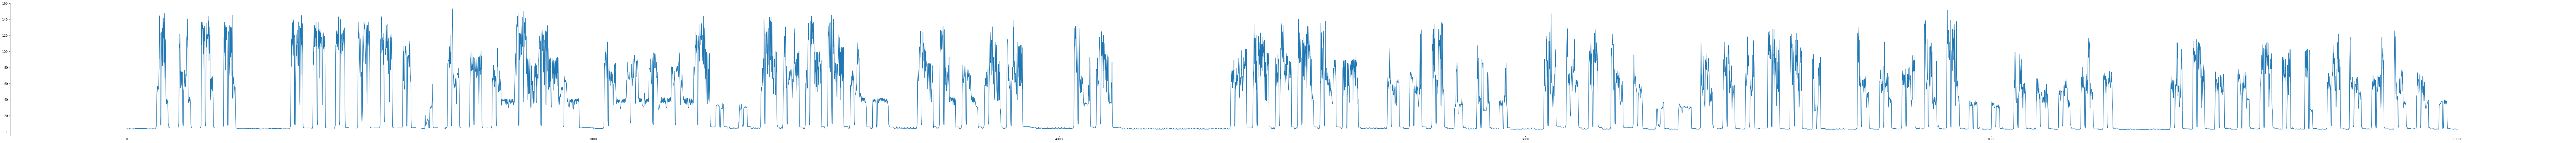

In [14]:
df['Usage_kWh'].plot(figsize=(150,8))

In [15]:
print(Industry_data.columns)

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')


In [16]:
print(Industry_data.columns[0:3])
# selecting the few variabes from the whole variables

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh'], dtype='object')


In [17]:
print(Industry_data.dtypes)
# Data types of all the columns

date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive_Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2_tCO2                                       float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
dtype: object


In [18]:
print(Industry_data['CO2_tCO2'].dtypes)
# to get the datatype of a respective(particular) column

float64


In [19]:
print(Industry_data.shape)
# It will gives the count of all the instances present in the dataset

(35040, 11)


In [20]:
print('Number of rows:',Industry_data.shape[0])
print('Number of columns:',Industry_data.shape[1])


Number of rows: 35040
Number of columns: 11


In [21]:
print(Industry_data.head(2)) 
# getting the first 2 rows

                 date  Usage_kWh  Lagging_Current_Reactive_Power_kVarh  \
0 2018-01-01 00:15:00       3.17                                  2.95   
1 2018-01-01 00:30:00       4.00                                  4.46   

   Leading_Current_Reactive_Power_kVarh  CO2_tCO2  \
0                                   0.0       0.0   
1                                   0.0       0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  


In [22]:
print(Industry_data.NSM.unique())
# prints the unique values from the section column

[  900  1800  2700  3600  4500  5400  6300  7200  8100  9000  9900 10800
 11700 12600 13500 14400 15300 16200 17100 18000 18900 19800 20700 21600
 22500 23400 24300 25200 26100 27000 27900 28800 29700 30600 31500 32400
 33300 34200 35100 36000 36900 37800 38700 39600 40500 41400 42300 43200
 44100 45000 45900 46800 47700 48600 49500 50400 51300 52200 53100 54000
 54900 55800 56700 57600 58500 59400 60300 61200 62100 63000 63900 64800
 65700 66600 67500 68400 69300 70200 71100 72000 72900 73800 74700 75600
 76500 77400 78300 79200 80100 81000 81900 82800 83700 84600 85500     0]


In [23]:
print(Industry_data.WeekStatus.unique()) 

['Weekday' 'Weekend']


In [24]:
print(Industry_data.Load_Type.unique())

['Light_Load' 'Medium_Load' 'Maximum_Load']


In [25]:
print(Industry_data.Load_Type.unique())

['Light_Load' 'Medium_Load' 'Maximum_Load']


In [26]:
print(Industry_data.Day_of_week.unique())

['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


## These below three blocks of code is completely dedicated to fetch the Missing values

In [27]:
# It will take out all the feature names which had null values
# The second line of the code will print the respective feature and the % of the missing values in that respective feature.

features_with_na=[features for features in Industry_data.columns if Industry_data[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(Industry_data[feature].isnull().mean(),4), '%missing value')

In [28]:
for feature in features_with_na:
    data_Industry=Industry_data.copy()
    data_Industry[feature]=np.where(data[feature].isnull(),1,0)
    data_Industry.groupby(feature)['Usage_kWh'].meadian().plot.bar()
    plt.title(feature)
    plt.show()
    

- Here if there is a relation between the missing values and the dependent variables. 
- we need to replace these nan values with something meaningful(Mean/Median/Mode/ some meaningful value) which will be done.
- In our scenario there are no missing values so no output. so, no need to worry about this.

## By this we can conclude that there are no Null Values present in the Dataset

In [29]:
# It will prints the count of Null values in the dataset. So, here there are No Null Values
print(Industry_data.isnull().sum())

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive_Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2_tCO2                                0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


# Exploratory Data Analysis (EDA) of the steel industry Dataset

In [30]:
pd.pandas.set_option('display.max_columns',None)

# Numerical Features

In [31]:
# It will take out all the features with Numerical Data.
numerical_features= [feature for feature in Industry_data.columns if Industry_data[feature].dtype != 'O']
print('Number of numerical features: ', len(numerical_features))
Industry_data[numerical_features].head()

Number of numerical features:  8


,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500


In [32]:
# Numerical Variables are of two types 
# Discrete and Continouos Varibales

Discrete_features= [feature for feature in numerical_features if len(Industry_data[feature].unique()) < 25]
print('Number of Discrete features: {}'.format(len(Discrete_features)))
Industry_data[Discrete_features].head()

Number of Discrete features: 1


,CO2_tCO2
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


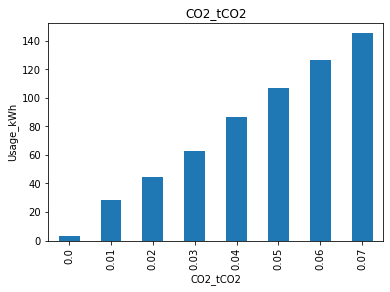

In [33]:
# Here we are finding the relationship between the Usage feature and discrete features

for feature in Discrete_features:
    data = Industry_data.copy()
    data.groupby(feature)['Usage_kWh'].median().plot.bar()
    plot.xlabel(feature)
    plot.ylabel('Usage_kWh')
    plot.title(feature)
    plot.show()
    

In [34]:
Continuous_features= [feature for feature in numerical_features if feature not in Discrete_features]
print('Number of continous features: {}'.format(len(Continuous_features)))
Industry_data[Continuous_features].head()

Number of continous features: 7


,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,2018-01-01 00:15:00,3.17,2.95,0.0,73.21,100.0,900
1,2018-01-01 00:30:00,4.00,4.46,0.0,66.77,100.0,1800
2,2018-01-01 00:45:00,3.24,3.28,0.0,70.28,100.0,2700
3,2018-01-01 01:00:00,3.31,3.56,0.0,68.09,100.0,3600
4,2018-01-01 01:15:00,3.82,4.50,0.0,64.72,100.0,4500


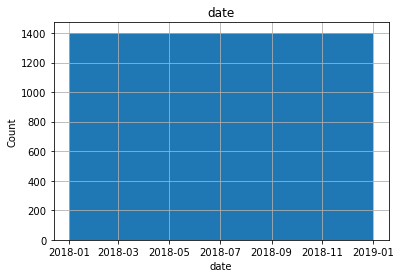

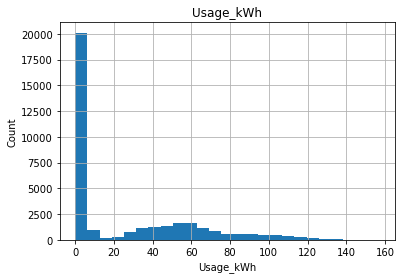

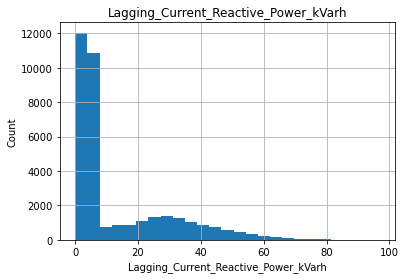

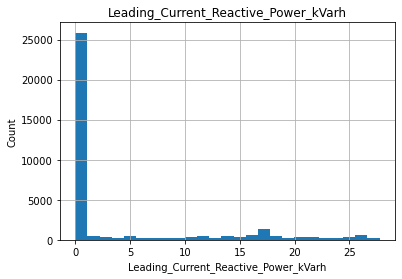

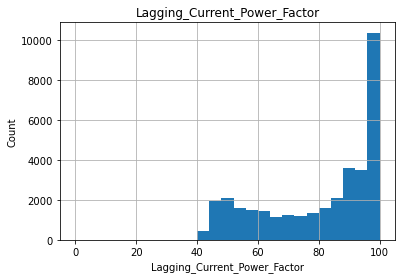

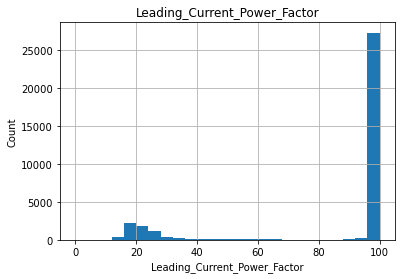

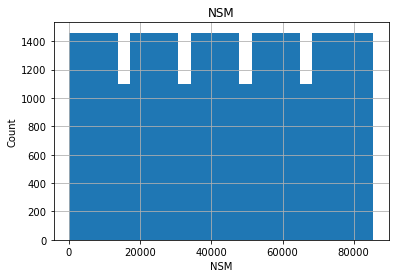

In [35]:
# These are the continuous variables and we will find the distributions of the continous variables for that we will use Histograms.
# There is a skewed data, so we need to convert skewed data into Gauss distribution or Standard Normal Distribution.
for feature in Continuous_features:
    data = Industry_data.copy()
    data[feature].hist(bins=25)
    plot.xlabel(feature)
    plot.ylabel('Count')
    plot.title(feature)
    plot.show()

In [36]:
Categorical_features= [feature for feature in Industry_data.columns if Industry_data[feature].dtype == 'O']
Categorical_features

['WeekStatus', 'Day_of_week', 'Load_Type']

In [37]:
Industry_data[Categorical_features].head()

,WeekStatus,Day_of_week,Load_Type
0,Weekday,Monday,Light_Load
1,Weekday,Monday,Light_Load
2,Weekday,Monday,Light_Load
3,Weekday,Monday,Light_Load
4,Weekday,Monday,Light_Load


In [38]:
for feature in Categorical_features:
    print('the feature is {} and number of categories are {}'.format(feature,len(Industry_data[feature].unique())))

the feature is WeekStatus and number of categories are 2
the feature is Day_of_week and number of categories are 7
the feature is Load_Type and number of categories are 3


In [39]:
Industry_data.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [40]:
Industry_data.corr()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2_tCO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


# Scatterplots for all the features with the feature 'Usage_kWh'

In [41]:
Industry_data.skew(axis = 1, skipna = True)

0        2.563833
1        2.626710
2        2.636982
3        2.640929
4        2.642776
           ...   
35035    2.645743
35036    2.645742
35037    2.645742
35038    2.645742
35039    1.323025
Length: 35040, dtype: float64

<AxesSubplot:xlabel='Lagging_Current_Reactive_Power_kVarh', ylabel='Usage_kWh'>

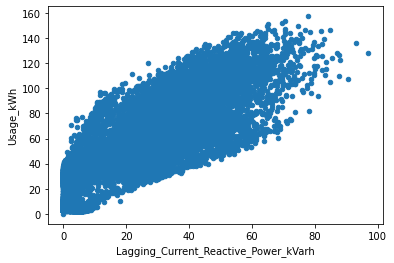

In [42]:
# scatterpot for Lagging_Current_Reactive_Power_kVarh & Usage_kWh
Industry_data.plot.scatter(x = 'Lagging_Current_Reactive_Power_kVarh', y = 'Usage_kWh')

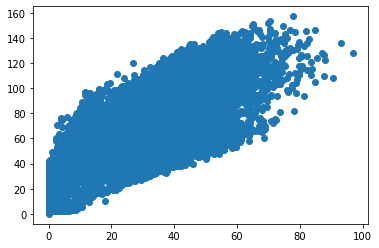

In [43]:
plot.scatter(Industry_data.Lagging_Current_Reactive_Power_kVarh, Industry_data.Usage_kWh)

<AxesSubplot:xlabel='Leading_Current_Reactive_Power_kVarh', ylabel='Usage_kWh'>

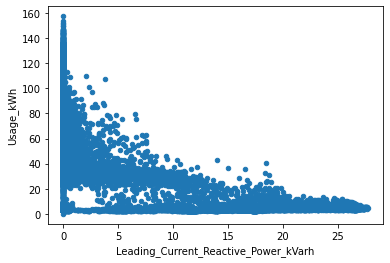

In [44]:
# scatterpot for Leading_Current_Reactive_Power_kVarh & Usage_kWh
Industry_data.plot.scatter(x = 'Leading_Current_Reactive_Power_kVarh', y = 'Usage_kWh')

## Here the data is Right skewed 
### So, applying log normal transformation and checking the skewness in the scatter plot

In [45]:
Industry_data['Leading_Current_Reactive_Power_kVarh_updated'] = np.log(Industry_data['Leading_Current_Reactive_Power_kVarh'])
Industry_data.head()


,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Leading_Current_Reactive_Power_kVarh_updated
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,-inf
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,-inf
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,-inf
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,-inf
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,-inf


<AxesSubplot:xlabel='Leading_Current_Reactive_Power_kVarh_updated', ylabel='Usage_kWh'>

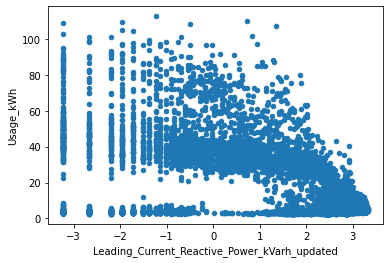

In [46]:
# scatterpot for Leading_Current_Reactive_Power_kVarh & Usage_kWh
Industry_data.plot.scatter(x = 'Leading_Current_Reactive_Power_kVarh_updated', y = 'Usage_kWh')

### The data is completely scattered after applying log normal transformation so bringing it back.

In [47]:
Industry_data = Industry_data.drop(['Leading_Current_Reactive_Power_kVarh_updated'], axis=1)


<AxesSubplot:xlabel='CO2_tCO2', ylabel='Usage_kWh'>

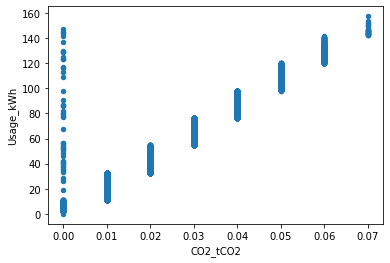

In [48]:
# scatterpot for CO2_tCO2 & Usage_kWh
Industry_data.plot.scatter(x = 'CO2_tCO2', y = 'Usage_kWh')

<AxesSubplot:xlabel='Lagging_Current_Power_Factor', ylabel='Usage_kWh'>

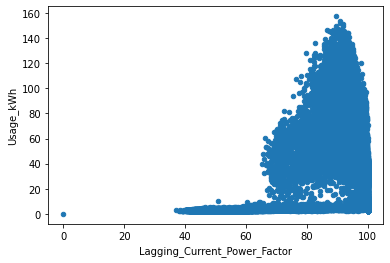

In [49]:
# scatterpot for Lagging_Current_Power_Factor & Usage_kWh
Industry_data.plot.scatter(x = 'Lagging_Current_Power_Factor', y = 'Usage_kWh')

<AxesSubplot:xlabel='Leading_Current_Power_Factor', ylabel='Usage_kWh'>

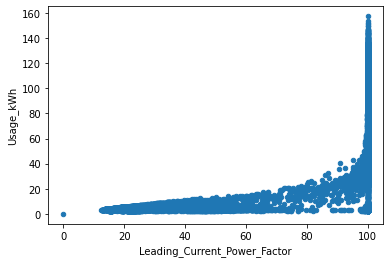

In [50]:
# scatterpot for Leading_Current_Power_Factor & Usage_kWh
Industry_data.plot.scatter(x = 'Leading_Current_Power_Factor', y = 'Usage_kWh')

<AxesSubplot:xlabel='NSM', ylabel='Usage_kWh'>

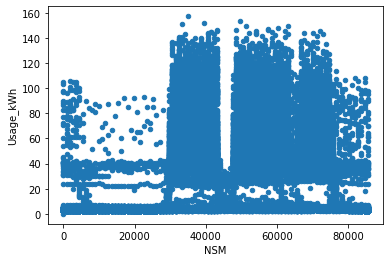

In [51]:
# scatterpot for NSM & Usage_kWh
Industry_data.plot.scatter(x = 'NSM', y = 'Usage_kWh')

### Box plots of all the features is presented below.

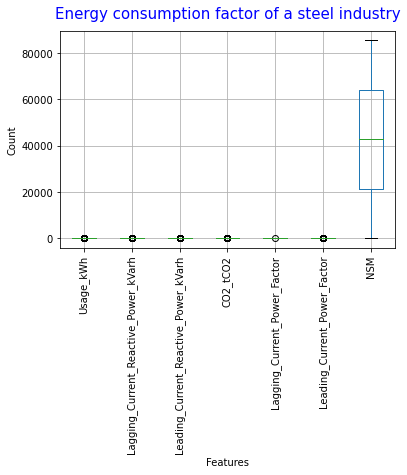

In [52]:
chart = Industry_data.boxplot(column = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2_tCO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plot.title('Energy consumption factor of a steel industry', fontsize = 15, color = 'b', pad = 12)
plot.xlabel('Features')
plot.ylabel('Count')
plot.show()

## Fetching and replacing outliers from Lagging_Current_Reactive_Power_kVarh

[Text(0.5, 1.0, 'Boxplot of Lagging_Current_Reactive_Power_kVarh')]

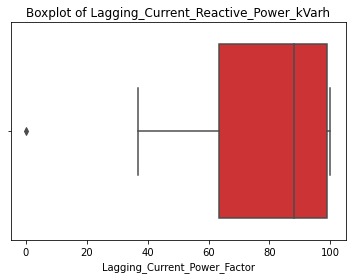

In [53]:
sns.boxplot(x='Lagging_Current_Power_Factor', data=Industry_data, palette='Set1').set(title='Boxplot of Lagging_Current_Reactive_Power_kVarh')

In [54]:
def outliers(df, feature):
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lowerBound = Q1 - 1.5*IQR
    upperBound = Q3 + 1.5*IQR

    outlier_indices = df.index[(df[feature] < lowerBound) | (df[feature] > upperBound)]

    return outlier_indices

In [55]:
def replace_outliers(df, feature, outlier_list, measure):
    replacement = 0.0
    if measure == 'Mean':
        replacement = df[feature].mean()
    elif(measure == 'Median'):
        replacement = df[feature].median()
    else:
        replacement = df[feature].mode()
    for idx in outlier_list:
        df[feature][idx] = replacement
    return

In [56]:
tsc_outliers = outliers(Industry_data, 'Lagging_Current_Power_Factor')
print('Indices of outliers: ', tsc_outliers)

Indices of outliers:  Int64Index([29855], dtype='int64')


In [57]:
replace_outliers(Industry_data, 'Lagging_Current_Power_Factor', tsc_outliers, 'Median')

[Text(0.5, 1.0, 'Boxplot of NSM')]

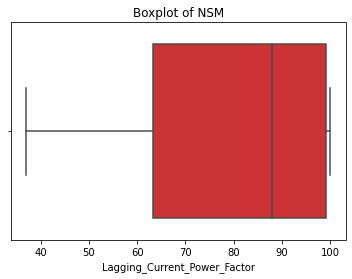

In [58]:
sns.boxplot(x='Lagging_Current_Power_Factor', data=Industry_data, palette='Set1').set(title='Boxplot of NSM')

## Fetching and replacing outliers from Leading_Current_Reactive_Power_kVarh

[Text(0.5, 1.0, 'Boxplot of CO2_tCO2')]

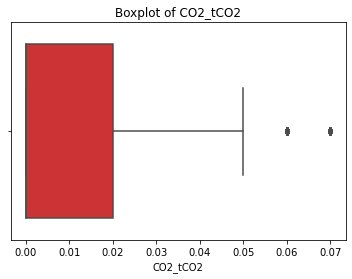

In [59]:
sns.boxplot(x='CO2_tCO2', data=Industry_data, palette='Set1').set(title='Boxplot of CO2_tCO2')

In [60]:
tsc_outliers = outliers(Industry_data, 'CO2_tCO2')
print('Indices of outliers: ', tsc_outliers)

Indices of outliers:  Int64Index([  228,   260,   262,   321,   323,   324,   325,   326,   328,
              330,
            ...
            33378, 33756, 33762, 33836, 33848, 33851, 33853, 33855, 33856,
            33859],
           dtype='int64', length=437)


In [61]:
replace_outliers(Industry_data, 'CO2_tCO2', tsc_outliers, 'Median')

## This is the Box Plot after working on the ourliers

[Text(0.5, 1.0, 'Boxplot of Leading_Current_Power_Factor')]

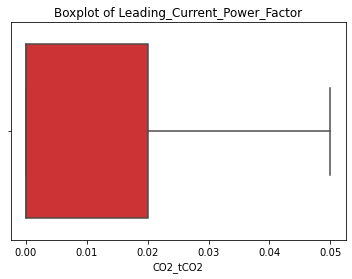

In [62]:
sns.boxplot(x='CO2_tCO2', data=Industry_data, palette='Set1').set(title='Boxplot of Leading_Current_Power_Factor')

In [63]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [64]:
from pandas_profiling import ProfileReport

In [65]:
profile_report = ProfileReport(Industry_data)

## This is the complete profile report of the data given.
## Each time when we want to work on this, we need to run this command.

In [66]:
profile_report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Spearman's Correlation map


<AxesSubplot:>

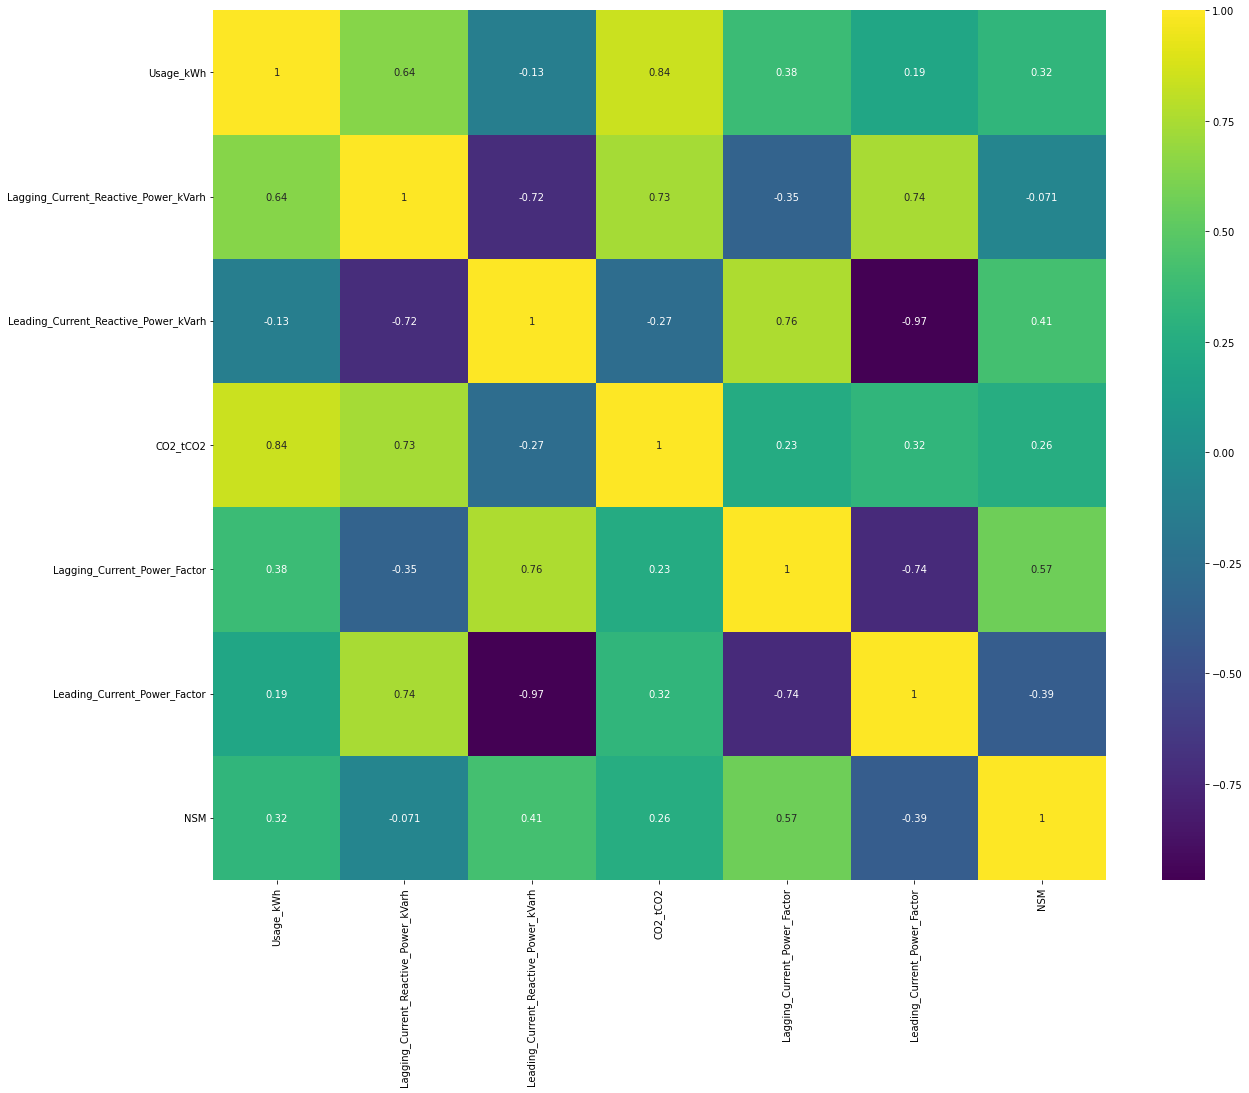

In [67]:
plot.figure(figsize=(20,16))
sns.heatmap(Industry_data.corr(method='spearman'),cmap='viridis',annot=True)

## Indexing is done on the data feature and one hot encoding is applied on categorical data.

In [68]:
#indexing date
Industry_data = Industry_data.set_index('date')

In [69]:
Week_Status = pd.get_dummies(Industry_data['WeekStatus'], prefix = 'Dummy')

In [70]:
Industry_data = pd.concat([Industry_data, Week_Status], axis = 1)

In [71]:
Industry_data

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Dummy_Weekday,Dummy_Weekend
date,,,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load,1,0
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load,1,0
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load,1,0
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load,1,0
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load,1,0
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load,1,0
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load,1,0


In [72]:
Week_Day = pd.get_dummies(Industry_data['Day_of_week'], prefix = 'Dummy')

In [73]:
Industry_data = pd.concat([Industry_data, Week_Day], axis = 1)

In [74]:
Industry_data

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Dummy_Weekday,Dummy_Weekend,Dummy_Friday,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday
date,,,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load,1,0,0,1,0,0,0,0,0
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load,1,0,0,1,0,0,0,0,0
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load,1,0,0,1,0,0,0,0,0
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load,1,0,0,1,0,0,0,0,0
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load,1,0,0,1,0,0,0,0,0
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load,1,0,0,1,0,0,0,0,0
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load,1,0,0,1,0,0,0,0,0


In [75]:
Load_Type = pd.get_dummies(Industry_data['Load_Type'], prefix = 'Dummy')

In [76]:
Industry_data = pd.concat([Industry_data, Load_Type], axis = 1)

Industry_data= Industry_data.drop(['WeekStatus', 'Day_of_week', 'Load_Type'], axis=1)

In [77]:
Industry_data

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekday,Dummy_Weekend,Dummy_Friday,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Light_Load,Dummy_Maximum_Load,Dummy_Medium_Load
date,,,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,0,0,1,0,0,0,0,0,1,0,0
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,0,0,1,0,0,0,0,0,1,0,0
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,0,0,1,0,0,0,0,0,1,0,0


In [78]:
Industry_data.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Dummy_Weekday', 'Dummy_Weekend', 'Dummy_Friday', 'Dummy_Monday',
       'Dummy_Saturday', 'Dummy_Sunday', 'Dummy_Thursday', 'Dummy_Tuesday',
       'Dummy_Wednesday', 'Dummy_Light_Load', 'Dummy_Maximum_Load',
       'Dummy_Medium_Load'],
      dtype='object')

In [79]:
print(Industry_data.dtypes)
# Data types of all the columns

Usage_kWh                               float64
Lagging_Current_Reactive_Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2_tCO2                                float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
Dummy_Weekday                             uint8
Dummy_Weekend                             uint8
Dummy_Friday                              uint8
Dummy_Monday                              uint8
Dummy_Saturday                            uint8
Dummy_Sunday                              uint8
Dummy_Thursday                            uint8
Dummy_Tuesday                             uint8
Dummy_Wednesday                           uint8
Dummy_Light_Load                          uint8
Dummy_Maximum_Load                        uint8
Dummy_Medium_Load                         uint8
dtype: object


In [80]:
data.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [81]:
Industry_data

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekday,Dummy_Weekend,Dummy_Friday,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Light_Load,Dummy_Maximum_Load,Dummy_Medium_Load
date,,,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,0,0,1,0,0,0,0,0,1,0,0
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,0,0,1,0,0,0,0,0,1,0,0
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,0,0,1,0,0,0,0,0,1,0,0


In [82]:
Industry_data.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Dummy_Weekday', 'Dummy_Weekend', 'Dummy_Friday', 'Dummy_Monday',
       'Dummy_Saturday', 'Dummy_Sunday', 'Dummy_Thursday', 'Dummy_Tuesday',
       'Dummy_Wednesday', 'Dummy_Light_Load', 'Dummy_Maximum_Load',
       'Dummy_Medium_Load'],
      dtype='object')

In [83]:
df_new = pd.DataFrame(columns = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Dummy_Weekday', 'Dummy_Weekend', 'Dummy_Friday', 'Dummy_Monday',
       'Dummy_Saturday', 'Dummy_Sunday', 'Dummy_Thursday', 'Dummy_Tuesday',
       'Dummy_Wednesday', 'Dummy_Light_Load', 'Dummy_Maximum_Load',
       'Dummy_Medium_Load'])

In [84]:
df_1 = Industry_data.iloc[:1000,:]
df_2 = Industry_data.iloc[1000:,:]

- Applying the logic as it is a timeseries dataset

In [85]:
for i in range(365):
    df_new = df_new.append(Industry_data.iloc[96*i])

In [86]:
df_new.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekday,Dummy_Weekend,Dummy_Friday,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Light_Load,Dummy_Maximum_Load,Dummy_Medium_Load
2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-02-01 00:15:00,3.2,3.1,0.0,0.0,71.82,100.0,900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2018-03-01 00:15:00,4.61,4.61,0.0,0.0,70.71,100.0,900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2018-04-01 00:15:00,4.61,4.57,0.0,0.0,71.02,100.0,900.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2018-05-01 00:15:00,4.72,5.15,0.0,0.0,67.57,100.0,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
df_new.shape

(365, 19)

In [88]:
df_new.tail()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekday,Dummy_Weekend,Dummy_Friday,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Light_Load,Dummy_Maximum_Load,Dummy_Medium_Load
2018-12-27 00:15:00,3.64,2.81,0.22,0.0,79.16,99.82,900.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2018-12-28 00:15:00,3.74,2.23,0.5,0.0,85.89,99.12,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-12-29 00:15:00,4.9,2.88,0.0,0.0,86.21,100.0,900.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-12-30 00:15:00,3.92,3.06,0.04,0.0,78.83,99.99,900.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-12-31 00:15:00,3.64,2.34,0.0,0.0,84.12,100.0,900.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [89]:
Industry_data

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekday,Dummy_Weekend,Dummy_Friday,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Light_Load,Dummy_Maximum_Load,Dummy_Medium_Load
date,,,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,0,0,1,0,0,0,0,0,1,0,0
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,0,0,1,0,0,0,0,0,1,0,0
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,0,0,1,0,0,0,0,0,1,0,0


In [90]:
X = df_new[['Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Dummy_Weekday', 'Dummy_Weekend', 'Dummy_Friday', 'Dummy_Monday',
       'Dummy_Saturday', 'Dummy_Sunday', 'Dummy_Thursday', 'Dummy_Tuesday',
       'Dummy_Wednesday', 'Dummy_Light_Load', 'Dummy_Maximum_Load',
       'Dummy_Medium_Load']].to_numpy()

y = df_new[['Usage_kWh']].to_numpy()



- Splitting the complete data into a Train and Test sets

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


## Naive Regression Baseline Model:

- Here we are assuming the predicted value as the median of the data.
- Using this we are claculating the Mean Absolute error, Mean Squared Errors and comparing with other models. 

In [92]:
def mae(y_true_value, y_pred):
    return np.mean(abs(y_true_value - y_pred))
baseline_prediction = np.median(y)
print("Baseline error on the test set: MAE = %0.4f" % mae(y_test, baseline_prediction))

Baseline error on the test set: MAE = 5.1993


In [93]:
def mse(y_true_value, y_pred):
    return np.mean((y_true_value - y_pred)**2)
baseline_prediction = np.median(y)
print("Baseline error on the test set: RMSE = %0.4f" % np.sqrt(mse(y_test, baseline_prediction)))

Baseline error on the test set: RMSE = 17.2505


# Fitting the training data to the linear Regression model.

In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [95]:
y_pred = regressor.predict(X_test)

- These are the errors calculated for the test data.

In [96]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


0.7243353112772309
4.902286700365471
2.2141108148341333


In [97]:
w = regressor.coef_
b = regressor.intercept_

In [98]:
w,b

(array([[ 3.67625220e-01,  1.65659755e-01,  1.50483962e+03,
          5.62634316e-02,  3.53783348e-02,  8.18545232e-12,
          3.90832937e-02, -3.90832937e-02, -1.42444222e-01,
         -6.14403896e-02,  1.64256272e-01, -2.03339566e-01,
          9.17146521e-02, -6.91558157e-02,  2.20409069e-01,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([-5.26608096]))

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9822168619328318

- Here, we are using R2 Score to evaluate the performace of the model.
- R2 score is used to evaluate the performance of a linear regression model.
- R2= 1- SSres / Sstot
- SSres is the sum of squares of the residual errors.
- SStot is the total sum of the errors.
- R2 indicates the proportion of data points which lie within the line created by the regression equation. A higher value of R2 is desirable as it indicates better results.
- If the value of R2 score is close to 1 then it is a good fit.


In [100]:
df_new_7 = pd.DataFrame(columns = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Dummy_Weekday', 'Dummy_Weekend', 'Dummy_Friday', 'Dummy_Monday',
       'Dummy_Saturday', 'Dummy_Sunday', 'Dummy_Thursday', 'Dummy_Tuesday',
       'Dummy_Wednesday', 'Dummy_Light_Load', 'Dummy_Maximum_Load',
       'Dummy_Medium_Load'])

In [101]:
df_1 = Industry_data.iloc[:1000,:]
df_2 = Industry_data.iloc[1000:,:]

In [102]:
for i in range(365):
    df_new_7 = df_new_7.append(Industry_data.iloc[96*i])

In [103]:
df_new_7

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekday,Dummy_Weekend,Dummy_Friday,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Light_Load,Dummy_Maximum_Load,Dummy_Medium_Load
2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-02-01 00:15:00,3.2,3.1,0.0,0.0,71.82,100.0,900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2018-03-01 00:15:00,4.61,4.61,0.0,0.0,70.71,100.0,900.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2018-04-01 00:15:00,4.61,4.57,0.0,0.0,71.02,100.0,900.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2018-05-01 00:15:00,4.72,5.15,0.0,0.0,67.57,100.0,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27 00:15:00,3.64,2.81,0.22,0.0,79.16,99.82,900.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2018-12-28 00:15:00,3.74,2.23,0.5,0.0,85.89,99.12,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-12-29 00:15:00,4.9,2.88,0.0,0.0,86.21,100.0,900.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-12-30 00:15:00,3.92,3.06,0.04,0.0,78.83,99.99,900.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [104]:
df_new.tail()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekday,Dummy_Weekend,Dummy_Friday,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Light_Load,Dummy_Maximum_Load,Dummy_Medium_Load
2018-12-27 00:15:00,3.64,2.81,0.22,0.0,79.16,99.82,900.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2018-12-28 00:15:00,3.74,2.23,0.5,0.0,85.89,99.12,900.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-12-29 00:15:00,4.9,2.88,0.0,0.0,86.21,100.0,900.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-12-30 00:15:00,3.92,3.06,0.04,0.0,78.83,99.99,900.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-12-31 00:15:00,3.64,2.34,0.0,0.0,84.12,100.0,900.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
Industry_data

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekday,Dummy_Weekend,Dummy_Friday,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Light_Load,Dummy_Maximum_Load,Dummy_Medium_Load
date,,,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,0,0,1,0,0,0,0,0,1,0,0
2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,0,0,1,0,0,0,0,0,1,0,0
2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,0,0,1,0,0,0,0,0,1,0,0
2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,0,0,1,0,0,0,0,0,1,0,0


In [106]:
X = df_new_7[['Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Dummy_Weekday', 'Dummy_Weekend', 'Dummy_Friday', 'Dummy_Monday',
       'Dummy_Saturday', 'Dummy_Sunday', 'Dummy_Thursday', 'Dummy_Tuesday',
       'Dummy_Wednesday', 'Dummy_Light_Load', 'Dummy_Maximum_Load',
       'Dummy_Medium_Load']].to_numpy()

y = df_new_7[['Usage_kWh']].to_numpy()



In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


# Ridge Regression Model

In [108]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

CPU times: user 1.87 ms, sys: 750 µs, total: 2.62 ms
Wall time: 2.06 ms


0.9677830053197554

In [109]:
y_pred = ridge.predict(X_test)

In [110]:
print(metrics.mean_absolute_error(y_test, y_pred))

1.3339583290979715


In [111]:
w = ridge.coef_
b = ridge.intercept_

In [112]:
w,b

(array([[ 1.60494048,  0.76859136,  8.28158689,  0.16482348,  0.0709178 ,
          0.        , -0.06916162,  0.06916162, -0.68364218,  0.38894991,
         -0.06168872,  0.13085033,  0.04573063,  0.35275268, -0.17295266,
          0.        ,  0.        ,  0.        ]]),
 array([-21.05328674]))

In [113]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9677830053197554

# Fitting the Train set to the Lasso Regression model

In [114]:
import statsmodels.api as sm

In [115]:
#Lasso Regression Model
lasso = Lasso(alpha = 0.5)
%time lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

CPU times: user 1.41 ms, sys: 734 µs, total: 2.14 ms
Wall time: 1.61 ms


0.9665633310588031

In [116]:
y_pred = lasso.predict(X_test)

In [117]:
print(metrics.mean_absolute_error(y_test, y_pred))


1.2497725628959666



- Here, I had tried fitting the data using Ridge and Lasso Regression models as well
- The Mean Absolute Errors in case of :
- Base Line model is 5.1993
- Linear Regression Model is 0.724
- Lasso Regression Model is 1.249
- Ridge Regression Model is 1.333